<a href="https://colab.research.google.com/github/wanwanliang/ML_Practices/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3,5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
x = iris.data[:, 2:]
y =  iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x,y)
accuracy_score(y, tree_clf.predict(x))

0.96

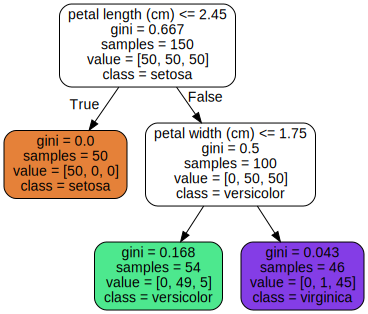

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = os.path.join(".", "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

Source.from_file(os.path.join('.', 'iris_tree.dot'))

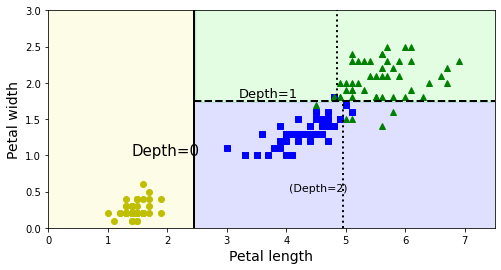

In [ ]:
from matplotlib.colors import ListedColormap
X = x
def plot_decision_boundary(clf, x, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  x_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(x_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  if plot_training:
      plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", label="Iris setosa")
      plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", label="Iris versicolor")
      plt.plot(x[:, 0][y==2], x[:, 1][y==2], "g^", label="Iris virginica")
      plt.axis(axes)
  if iris:
      plt.xlabel("Petal length", fontsize=14)
      plt.ylabel("Petal width", fontsize=14)
  else:
      plt.xlabel(r"$x_1$", fontsize=18)
      plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  if legend:
      plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()